In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    cur_mat = cur_mat * maxV;
    x = np.exp(cur_mat) - 1.0;

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)

    neg_idx = x < 0.0
    x[neg_idx] = 0.0

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)
    
    return x

def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy")
    # ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy), interpolation='none')
        
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
    # ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output), interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean")
    # ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()

### homo

In [3]:
def compute_snr(matfile):
    dat_px = spio.loadmat(matfile, squeeze_me=True)
    dat_px = dat_px['data']

    # each data array is 4D tensor (x , y, z, samples)
    samples = dat_px.shape[-1]
    
    snr_array = np.zeros((samples, 100), dtype=np.float32)
    
    for i in xrange(samples):
        img50 = dat_px[:,49,:,i]  # for current example, take the 50 image along the y-axis
        vect_mid = img50[49,:]
        snr_array[i,:] = vect_mid

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [4]:
snr_dir = '/space/neza/2/users/yaoshen/NEU/Research/MRI filtering/mcxlab_nightlybuild/data'

In [5]:
#
# read snr data set
#

p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat')

In [6]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

### NN model output

In [7]:
def compute_snr_from_array(nn_hom1e5):
    [samples, im_w, im_h] = nn_hom1e5.shape
    snr_array = np.zeros((samples, im_h), dtype=np.float32)

    for i in xrange(samples):
        vect_mid = nn_hom1e5[i,49,:]  # take the 50th vector of 100x100
        snr_array[i,:] = vect_mid  # save 100

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    
#     log_array = np.log(snr_array)
#     log_means = np.mean(log_array, axis=0)
#     log_std   = np.std(log_array, axis=0)
#     print "\n log_means"
#     for i in log_means: print i
#     print "\nlog_std"
#     for i in log_std: print i
        
#    log10_array = np.log10(snr_array)
#    log10_means = np.mean(log10_array, axis=0)
#    log10_std   = np.std(log10_array, axis=0)
#    print "\n log10_means"
#    for i in log10_means: print i
#    print "\nlog10_std"
#    for i in log10_std: print i
        
        
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [8]:
nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_hom1e5 = convert_data2org(nn_hom1e5) # convert back to original format

nn_snr = compute_snr_from_array(nn_hom1e5)

(100, 100, 100)


In [9]:
for i in nn_snr: print i

48.405834
48.064404
44.551567
41.587303
37.052788
36.29995
33.930084
31.733318
31.751554
31.736515
30.465143
30.597794
30.425692
32.888588
30.876825
29.044065
32.445354
32.119846
30.540007
29.462158
29.194
28.90478
28.425419
28.927889
28.732386
28.071507
27.696009
27.191021
26.137598
25.381111
24.420586
24.063196
23.707237
23.712437
23.232021
22.546963
22.047058
20.691452
19.959156
19.736012
19.538643
19.46712
18.553644
17.87728
16.893255
16.177681
16.993914
16.204475
16.521055
15.249206
14.1823845
13.698427
13.887672
13.615969
13.069952
12.248465
11.864419
12.036045
11.919903
12.151592
12.378534
13.467817
13.9623375
14.634033
14.651389
14.637018
15.159272
16.577427
16.484325
17.686497
17.834032
19.362705
18.94216
20.543125
21.204224
23.199245
23.454046
25.889698
26.458635
27.462263
27.994396
30.57947
30.54346
30.112106
30.021612
31.913336
33.410347
32.52892
34.54618
36.938015
39.66742
41.38176
45.061573
50.50618
50.702633
50.56266
52.713173
61.78917
62.691353
57.662167


### absorber3

In [10]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e8_pack1.mat')

In [11]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [12]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_absorb1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [13]:
for i in nn_snr: print i

48.80397
47.047157
44.113426
41.454548
38.13023
36.79893
33.99837
32.20153
31.774721
31.810846
32.761047
32.043327
30.55193
30.78905
30.05233
27.96087
26.521482
26.160582
25.944643
25.631826
24.832092
24.606705
24.273422
23.42469
22.589527
22.43458
23.54316
21.271896
20.992893
18.435295
19.75262
16.935713
15.344
16.38725
15.67429
17.428932
18.480011
20.625467
21.526106
22.215847
23.830643
24.301575
24.157045
24.63331
25.11181
27.263144
29.24274
29.022873
31.001919
32.97502
34.88231
34.18359
37.077003
42.142166
43.727005
43.78382
46.13443
49.11284
51.19957
50.724224
53.13167
59.78321
61.70645
61.65551
63.39583
67.121826
68.65523
69.08
70.1556
72.491394
73.797325
73.81018
74.58798
75.98598
76.97917
76.36468
77.18624
79.158165
79.45395
78.86705
79.855705
82.818306
83.771935
83.39825
84.76305
89.627266
91.79818
91.38986
95.39689
99.16345
102.334366
101.43054
106.06711
111.061615
107.91185
108.67309
107.21869
110.29362
111.6533
108.222336


### refractive

In [14]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e8_pack1.mat')

In [15]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [16]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_refractive1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [17]:
# for i in nn_snr: print i

### show image 

(100, 100, 100)


/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


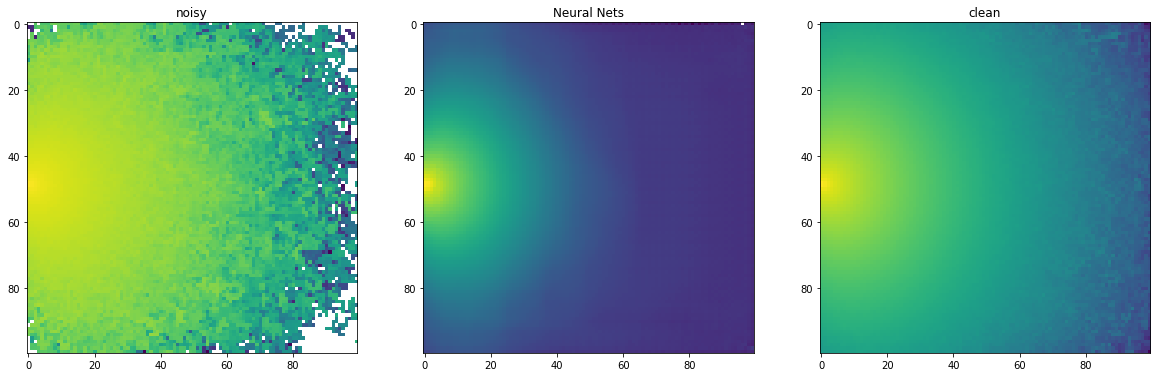

In [18]:
# =====================
#  homo
# =====================
noisy_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat', squeeze_me=True)
noisy_mat = noisy_mat['data']
noisy_img = noisy_mat[:,49,:,0]  # 100x100


clean_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat', squeeze_me=True)
clean_mat = clean_mat['data']
clean_img = clean_mat[:,49,:,0]  # 100x100


nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_img = convert_data2org(nn_hom1e5) # convert back to original format
nn_img = nn_img[0,...]

plot_results(noisy_img, nn_img, clean_img)